In [5]:
"""rlc_circuit.ipynb"""

# Cell 01

duration = 1  # running simulation out to 1 second

# Declare physical parameters of the system
resistance = 0.1  # Resistance (Ohms)
inductance = 0.01  # Inductance (Henries)
capacitance = 0.01  # Capacitance (Farads)

# Set initial conditions
I_o = 1  # Current (Amps)
I_dot_o = 0  # Derivative of the current at time 0, assume 0

# Precompute relevant ratios
resist_capac = resistance / capacitance
induc_capac = 1 / (inductance * capacitance)

# Print our parameters and initial condition
print(f"R = {resistance} Ohms", end=", ")
print(f"L = {inductance} Henries", end=", ")
print(f"C = {capacitance} Farads")
print(f"Initial DC Current = {I_o} Amps")
print(f"Initial Derivative of DC Current = {I_dot_o} Amps/sec")

R = 0.1 Ohms, L = 0.01 Henries, C = 0.01 Farads
Initial DC Current = 1 Amps
Initial Derivative of DC Current = 0 Amps/sec


Define the model using differential equations:
- Let $\dfrac{dI}{dt}=\dot I$
- Then $\dfrac{d\dot I}{dt} = -\frac{R}{L}\dot I -\frac{1}{LC}I$

In [6]:
# Cell 02

import inspect


def model(time, state_vector, r_l, l_c):
    current_dot, current = state_vector  # unpack dependent variables
    # Observe that we're using 1st order ODE's to break apart the 2nd
    # order one, just like the damped pendulum
    d_current_dot = -r_l * current_dot - l_c * current
    d_current = current_dot
    return d_current_dot, d_current


# Have a look at the model function, as done in predator_prey.ipynb
print(f"Function name  : {model.__name__}")
print(f"Parameter names: {inspect.signature(model)}")

Function name  : model
Parameter names: (time, state_vector, r_l, l_c)


In [9]:
# Cell 03

import pandas as pd
from scipy.integrate import solve_ivp

sol = solve_ivp(
    model,
    (0, duration),  # tuple of time span
    [I_dot_o, I_o],  # initial state vector
    max_step=duration / 1000,  # maximum time step
    args=(resist_capac, induc_capac),  # tuple of constants used in ODE
)

# Retrieve results of the solution
time_steps = sol.t
currents = sol.y[1]

pd.DataFrame({"time": time_steps[:5], "current": currents[:5]})

,time,current
0,0.000000e+00,1.000000
1,9.990010e-08,1.000000
2,1.098901e-06,1.000000
3,1.108891e-05,0.999999
4,1.109890e-04,0.999938


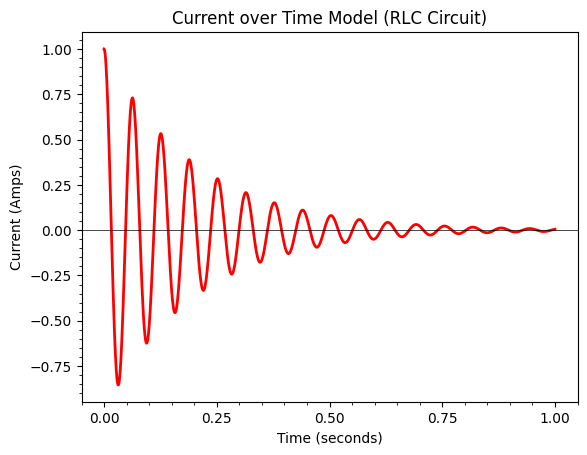

In [14]:
# Cell 04

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.plot(time_steps, currents, label="current", color="red", linewidth=2)
plt.axhline(0, color="black", linewidth=0.5)
plt.title("Current over Time Model (RLC Circuit)")
plt.xlabel("Time (seconds)")
plt.ylabel("Current (Amps)")
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.show()
